# Fitting data for the Gutenberg-Richter Model of Earthquake Magnitudes

Here, we plot the curve of the number of earthquakes
greater than magnitude M, for each M value.

So, we loop over the earthquakes, and store the
frequency of each magnitude. At the end of the loop,
we compute the cumulative distribution such that the
value at magnitude M will be the integral of the frequency
distribution for >= M. This is what the Gutenberg-Richter
Model predicts. 

The data we use are from [here](http://earthquake.usgs.gov/earthquakes/search/). 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from least_squares import least_squares

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

 Earthquake data: Gutenberg-Richter Model
 least_squares fit to data:
 slope b =  0.072 +-  0.007
 intercept a =  3.695 +-  0.032
 log_10(N) error bar =  0.123


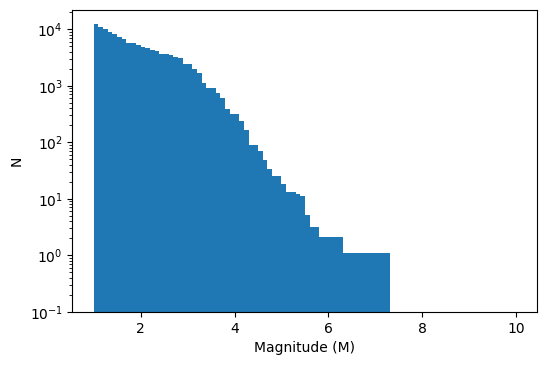

In [3]:


# data downloaded from http://earthquake.usgs.gov/earthquakes/search/
print (' Earthquake data: Gutenberg-Richter Model')

magvalues = np.genfromtxt(fname='california_earthquakes_2010_to_2013.csv', usecols=(4),skip_header=1, delimiter=',')
dN_values,edges = np.histogram(magvalues,bins=90)

# x data = M values sorted in increasing order
# y data = log_10(N) where N = number of events with magnitude >= M
M_values = edges[:-1]
log10N_values = np.log10( np.cumsum(dN_values) )

# perform a least square fit
fit = least_squares(M_values, log10N_values)

plt.figure(1)
plt.hist( magvalues, bins=90, range=[1.0,10.0], log=True, bottom=0.1,cumulative=-1)
plt.xlabel( 'Magnitude (M)' )
plt.ylabel( 'N' )

print (' least_squares fit to data:')
print (' slope b = {0:6.3f} +- {1:6.3f}'.format( fit[1], fit[4]))
print (' intercept a = {0:6.3f} +- {1:6.3f}'.format( fit[0], fit[3]))
print (' log_10(N) error bar = {0:6.3f}'.format( fit[2] ))

plt.show()
